In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [63]:
data = pd.read_csv('/content/day.csv')
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [65]:
# Check the missing values
missing_values = data.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


- No missing values found

 - Remove the colums which will not play any role in prediction
   **casual ,registered , instant and dteday**

In [66]:
data = data.drop(columns=['instant','dteday','casual','registered'])

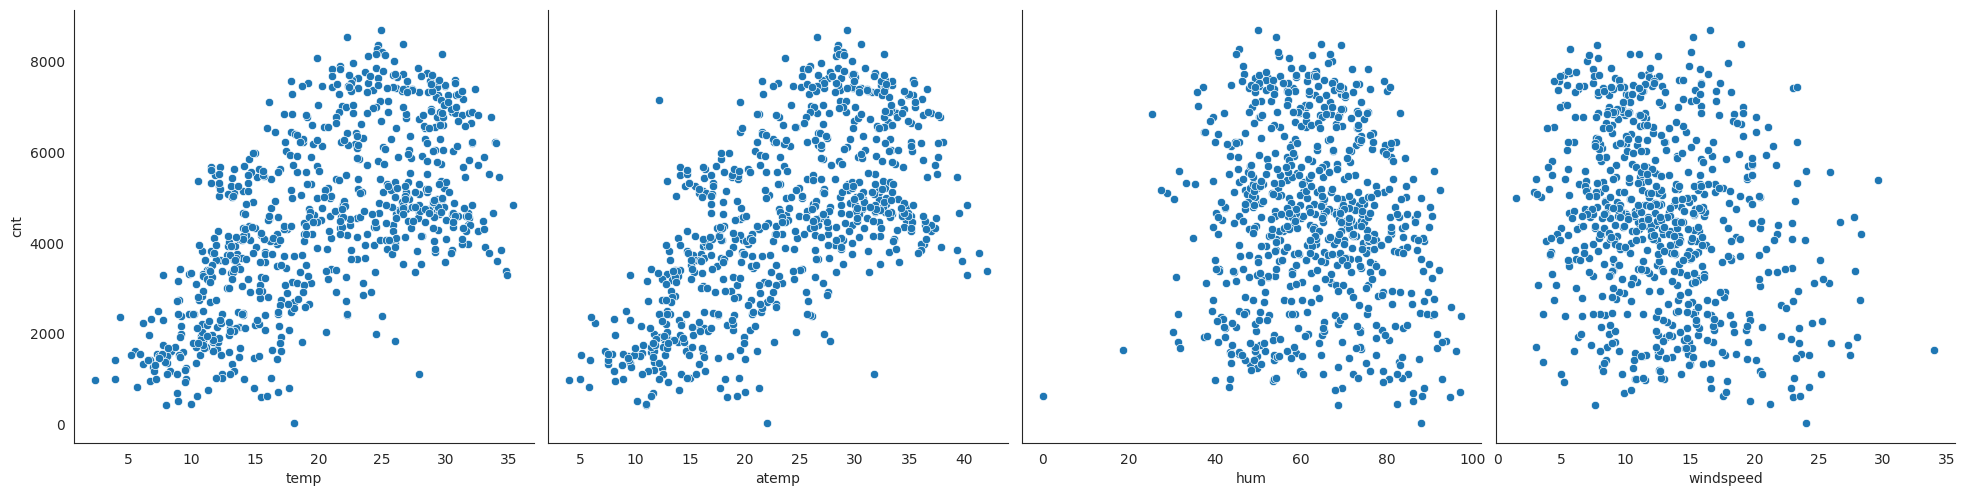

In [67]:
sns.set_style("white")
sns.pairplot(data=data,x_vars=['temp','atemp','hum','windspeed'],y_vars='cnt',kind='scatter',height=5,aspect=1);

- The number of rentals per day seem to be increasing with temperature and adjusted temperature
- Adjusted temperature and temperature have similar trends


- Let find the outliers as in graph there are few outliers exist that need to clean.

In [68]:
# Conditions for dropping outliers
conditions = [
    (data['temp'] > 15) & (data['temp'] < 20) & (data['cnt'] < 100),
    (data['temp'] > 25) & (data['temp'] < 30) & (data['cnt'] < 2000),
    (data['atemp'] > 20) & (data['atemp'] < 25) & (data['cnt'] < 100),
    (data['atemp'] > 30) & (data['atemp'] < 35) & (data['cnt'] < 2000),
    (data['hum'] < 20),
    (data['windspeed'] > 30)
]

# dropping outliers
for condition in conditions:
    data = data.drop(index=data[condition].index)


In [69]:
# checking correlation with below variables
correlation = data[['temp','atemp','hum','windspeed','cnt']].corr()['cnt'].apply(lambda x : round(x,4))
correlation = pd.DataFrame(correlation).sort_values(by='cnt',ascending=False)
correlation.drop(index=['cnt'],inplace=True)


In [70]:
# dropping registered,casual, instant
correlation.style.background_gradient(cmap='GnBu')

,cnt
atemp,0.638900
temp,0.635600
hum,-0.107600
windspeed,-0.218100


- Adjusted temperature has the highest positive correlation with cnt followed by temperature.
- Hum has the lowest correlation.

In [71]:
# correlation between temp  and atemp
data[['temp','atemp']].corr()

,temp,atemp
temp,1.000000,0.991726
atemp,0.991726,1.000000


- The correlation between temp and atemp is almost 1, so keep only one and other one can be dropped.

In [72]:
data = data.drop(columns=['atemp'])

In [73]:
data[['temp','hum','windspeed']].corr()

,temp,hum,windspeed
temp,1.000000,0.122673,-0.160295
hum,0.122673,1.000000,-0.247498
windspeed,-0.160295,-0.247498,1.000000


It shows that there is no corelation between - temp, hum	& windspeed

In [74]:
# Converting variables into categorical type
data[['season','weathersit','mnth']] = data[['season','weathersit','mnth']].astype('category')

In [75]:
# Identifying data entries that are not explicitly missing but contain placeholder values (e.g., 999, "N/A") indicating absence.
# Detecting these ensures accurate analysis and data integrity.
catvars = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
for i in catvars :
    print('Unique values in ',i, data[i].unique())

Unique values in  season [1, 2, 3, 4]
Categories (4, int64): [1, 2, 3, 4]
Unique values in  yr [0 1]
Unique values in  mnth [1, 2, 3, 4, 5, ..., 8, 9, 10, 11, 12]
Length: 12
Categories (12, int64): [1, 2, 3, 4, ..., 9, 10, 11, 12]
Unique values in  holiday [0 1]
Unique values in  weekday [6 0 1 2 3 4 5]
Unique values in  workingday [0 1]
Unique values in  weathersit [2, 1, 3]
Categories (3, int64): [1, 2, 3]


- No placeholder values values exist

In [76]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600


In [77]:
# Replacing numbers with labels
season_labels = {
    1 : 'spring',
    2 : 'summer',
    3 : 'fall',
    4 : 'winter'
}

mnth_labels = {
    1 : 'january',
    2 : 'february',
    3 : 'march',
    4 : 'april',
    5 : 'may',
    6 : 'june',
    7 : 'july',
    8 : 'august',
    9 : 'september',
    10 : 'october',
    11 : 'november',
    12 : 'december'
}

weekday_labels = { # considering the first row of dteday to be 01-01-2011
    0 : 'Sunday',
    1 : 'Monday',
    2 : 'Tuesday',
    3 : 'Wednesday',
    4 : 'Thursday',
    5 : 'Friday',
    6 : 'Saturday'
}

weathersit_labels = {
    1 : 'clear',
    2 : 'cloudy',
    3 : 'light snow/rain'
}

# replacing numerals with labels
data['season'] = data['season'].replace(season_labels)
data['mnth'] = data['mnth'].replace(mnth_labels)
data['weekday'] = data['weekday'].replace(weekday_labels)
data['weathersit'] = data['weathersit'].replace(weathersit_labels)

In [78]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,january,0,Saturday,0,cloudy,14.110847,80.5833,10.749882,985
1,spring,0,january,0,Sunday,0,cloudy,14.902598,69.6087,16.652113,801
2,spring,0,january,0,Monday,1,clear,8.050924,43.7273,16.636703,1349
3,spring,0,january,0,Tuesday,1,clear,8.200000,59.0435,10.739832,1562
4,spring,0,january,0,Wednesday,1,clear,9.305237,43.6957,12.522300,1600


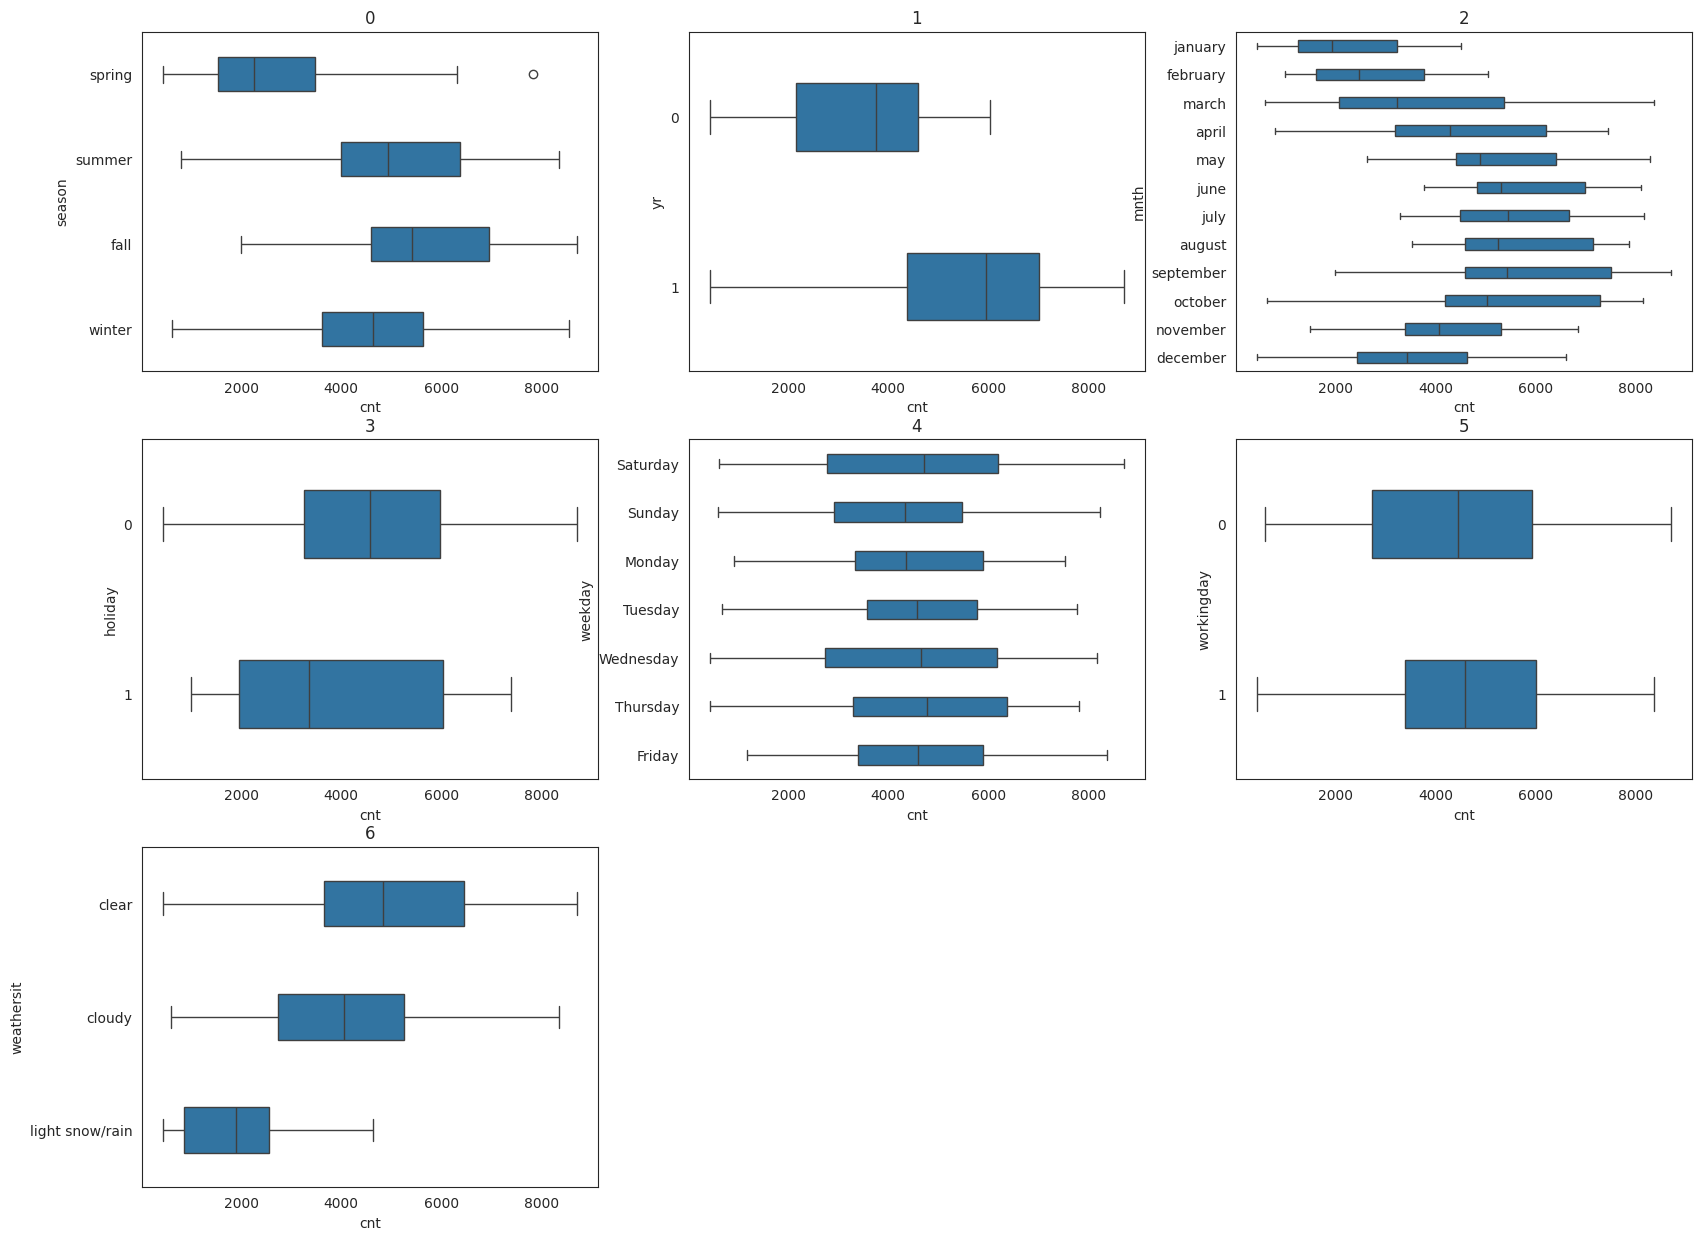

In [79]:
import warnings
warnings.filterwarnings('ignore')
cat_vars = ['season','yr','mnth','holiday','weekday',  'workingday','weathersit']
data1 = data[cat_vars]
data1.loc[:,'cnt'] = data['cnt'].values
data1[['yr','holiday','workingday']] = data1[['yr','holiday','workingday']].astype('category')
plot_dim = [3,3]
fig,axs = plt.subplots(*plot_dim)
fig.set_figheight(15)
fig.set_figwidth(20)
for i in range(plot_dim[0]) :
    for j in range(plot_dim[1]) :
        axs[i,j].set(title = i*plot_dim[1]+j)
        sns.boxplot(data=data1,x='cnt',y=cat_vars[i*plot_dim[1]+j],width=0.4,ax=axs[i,j])
        if i*plot_dim[1]+j == 6 :
            break
axs[2,1].set_axis_off()
axs[2,2].set_axis_off()

1. From the plot of rentals per day by season, fall has the highest average rentals, followed by summer.
1. Yearly rental data shows a median increase of 2000 rentals in 2019 compared to 2018.
1. According to the month-wise plot, September has the highest rentals, followed by the two adjacent months, which seems to be influenced by seasonal trends.
1. Holidays have a lower rental count compared to working days, with greater variability in demand on holidays.
1. There is no significant difference in rentals across weekdays, except that Thursdays and Sundays show higher variability in rentals than other days.

# Dropping outliers in Categorical Variables


In [80]:
data = data.drop(index = data[(data['season'] == 'spring') & (data['cnt'] > 7000)].index)

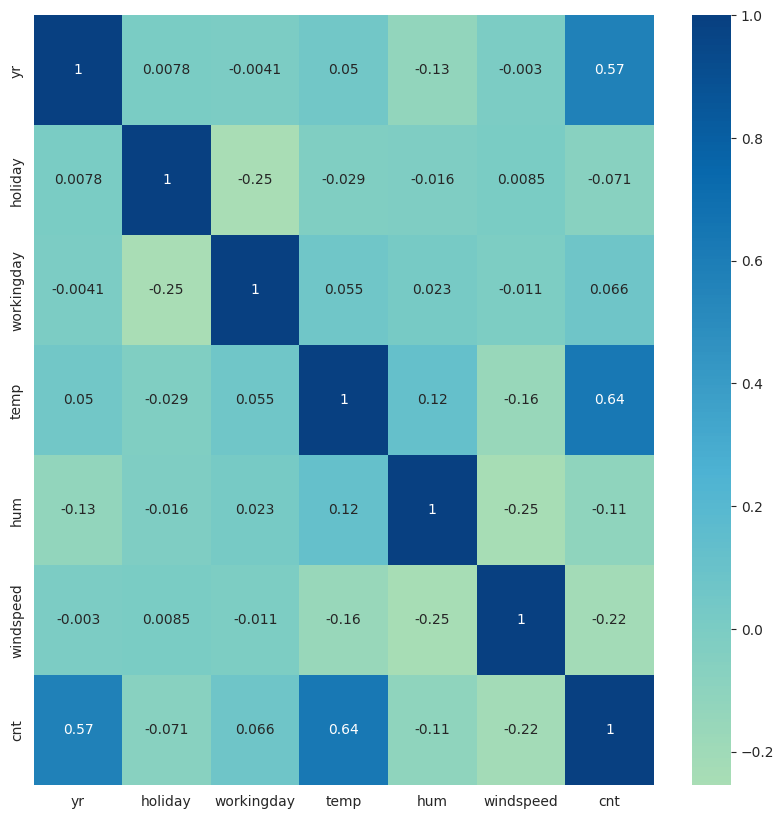

In [81]:
# correlation among variables

# Select only numeric columns from the DataFrame
numeric_data = data.select_dtypes(include=[float, int])

# Compute the correlation matrix on numeric data
correlation_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=[10,10])
sns.heatmap(correlation_matrix, cmap='GnBu', center=0, annot=True)
plt.show()

In [82]:
# Data Prepration - creating indicator variable columns
season_indicators = pd.get_dummies(data['season'],drop_first=True)
mnth_indicators = pd.get_dummies(data['mnth'],drop_first=True)
weekday_indicators = pd.get_dummies(data['weekday'],drop_first=True)
weathersit_indicators = pd.get_dummies(data['weathersit'],drop_first=True)

In [83]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,january,0,Saturday,0,cloudy,14.110847,80.5833,10.749882,985
1,spring,0,january,0,Sunday,0,cloudy,14.902598,69.6087,16.652113,801
2,spring,0,january,0,Monday,1,clear,8.050924,43.7273,16.636703,1349
3,spring,0,january,0,Tuesday,1,clear,8.200000,59.0435,10.739832,1562
4,spring,0,january,0,Wednesday,1,clear,9.305237,43.6957,12.522300,1600


In [84]:
from sklearn.model_selection import train_test_split

In [85]:
d_train,d_test = train_test_split(data,train_size=0.8,test_size=0.2,random_state=120)

In [86]:
# normalization of continuous variables
from sklearn.preprocessing import MinMaxScaler
numerical_scaler = MinMaxScaler()
num_vars = ['temp','hum','windspeed']

numerical_scaler.fit(d_train[num_vars])
d_train[num_vars] = numerical_scaler.transform(d_train[num_vars])

In [87]:
X_train = d_train
y_train = d_train.pop('cnt')


In [88]:
y_train.head()

671    5138
162    4460
569    7592
175    5202
164    4891
Name: cnt, dtype: int64

In [89]:
X_train.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed
671,winter,1,november,0,Saturday,0,cloudy,0.354130,0.330046,0.571621
162,summer,0,june,0,Sunday,0,clear,0.789210,0.687355,0.303720
569,fall,1,july,0,Tuesday,1,clear,0.861895,0.558004,0.423660
175,fall,0,june,0,Saturday,0,clear,0.792325,0.319025,0.418943
164,summer,0,june,0,Tuesday,1,clear,0.679142,0.352087,0.568500


In [94]:
X_train.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed'],
      dtype='object')

In [106]:
X_train.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed
671,winter,1,november,0,Saturday,0,cloudy,0.354130,0.330046,0.571621
162,summer,0,june,0,Sunday,0,clear,0.789210,0.687355,0.303720
569,fall,1,july,0,Tuesday,1,clear,0.861895,0.558004,0.423660
175,fall,0,june,0,Saturday,0,clear,0.792325,0.319025,0.418943
164,summer,0,june,0,Tuesday,1,clear,0.679142,0.352087,0.568500


In [110]:
# Check the unique values in the 'season' column
print(data['season'].values)


[1, 1, 1, 1, 1, ..., 1, 1, 1, 1, 1]
Length: 724
Categories (4, int64): [1, 2, 3, 4]


In [120]:
season_labels = {
    1: 'spring',
    2: 'summer',
    3: 'fall',
    4: 'winter'
}
mnth_labels = {
    1 : 'january',
    2 : 'february',
    3 : 'march',
    4 : 'april',
    5 : 'may',
    6 : 'june',
    7 : 'july',
    8 : 'august',
    9 : 'september',
    10 : 'october',
    11 : 'november',
    12 : 'december'
}

# Original dictionaries
weekday_labels = {
    0 : 'Sunday',
    1 : 'Monday',
    2 : 'Tuesday',
    3 : 'Wednesday',
    4 : 'Thursday',
    5 : 'Friday',
    6 : 'Saturday'
}

weathersit_labels = {
    1 : 'clear',
    2 : 'cloudy',
    3 : 'light snow/rain'
}

weekday_number_to_label = {v: k for k, v in weekday_labels.items()}
weathersit_number_to_label = {v: k for k, v in weathersit_labels.items()}
X_train['weekday'] = X_train['weekday'].replace(weekday_number_to_label)
X_train['weathersit'] = X_train['weathersit'].replace(weathersit_number_to_label)

mnth_number_to_label = {v: k for k, v in mnth_labels.items()}
X_train['mnth'] = X_train['mnth'].replace(mnth_number_to_label)


label_to_number = {v: k for k, v in season_labels.items()}

X_train['season'] = X_train['season'].replace(label_to_number)
X_train.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed
671,4,1,11,0,6,0,2,0.354130,0.330046,0.571621
162,2,0,6,0,0,0,1,0.789210,0.687355,0.303720
569,3,1,7,0,2,1,1,0.861895,0.558004,0.423660
175,3,0,6,0,6,0,1,0.792325,0.319025,0.418943
164,2,0,6,0,2,1,1,0.679142,0.352087,0.568500


In [121]:
# Selecting 15 Features using Recursive Feature Elimination (RFE)

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

lr_estimator = LinearRegression()
rfe = RFE(lr_estimator,n_features_to_select=15, step=1)
rfe
selector = rfe.fit(X_train,y_train)

In [122]:
# RFE Feature Ranking
rfe_ranking = pd.DataFrame({'rank' : selector.ranking_, 'support': selector.support_, 'features' : X_train.columns}).sort_values(by='rank',ascending=True)
rfe_ranking

,rank,support,features
0,1,True,season
1,1,True,yr
2,1,True,mnth
3,1,True,holiday
4,1,True,weekday
5,1,True,workingday
6,1,True,weathersit
7,1,True,temp
8,1,True,hum
9,1,True,windspeed


In [123]:
selected_features = rfe_ranking.loc[rfe_ranking['rank'] == 1,'features'].values
selected_features

array(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed'], dtype=object)

In [131]:
import statsmodels.api as sm
def ols_fit(y,X) :
    X_train_sm = sm.add_constant(X)
    model = sm.OLS(y,X_train_sm).fit() # Function to Perform Ordinary Least Squares (OLS) Regression
    print(model.summary())
    return model

# DataFrame sorted by VIF values in descending order
def vif(X) :
    df = sm.add_constant(X)
    vif = [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    vif_frame = pd.DataFrame({'vif' : vif[0:]},index = df.columns).reset_index()
    print(vif_frame.sort_values(by='vif',ascending=False))

In [133]:
features_1 = selected_features
ols_fit(y_train,X_train[features_1])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     228.1
Date:                Tue, 30 Jul 2024   Prob (F-statistic):          1.51e-191
Time:                        10:28:57   Log-Likelihood:                -4729.5
No. Observations:                 579   AIC:                             9481.
Df Residuals:                     568   BIC:                             9529.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1402.5029    202.778      6.916      0.0

- Dropping **holiday** because of high p-value

A high p-value suggests that there is not enough evidence to reject the null hypothesis. This means that the variable is not significantly contributing to the model, and its effect on the dependent variable might be negligible.

In [134]:
del_feature = 'holiday'
selected_features = selected_features[selected_features!=del_feature]
ols_fit(y_train,X_train[selected_features])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     250.3
Date:                Tue, 30 Jul 2024   Prob (F-statistic):          2.32e-191
Time:                        10:30:54   Log-Likelihood:                -4732.8
No. Observations:                 579   AIC:                             9486.
Df Residuals:                     569   BIC:                             9529.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1314.2400    200.758      6.546      0.0

In [135]:
final_model = ols_fit(y_train,X_train[selected_features])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     250.3
Date:                Tue, 30 Jul 2024   Prob (F-statistic):          2.32e-191
Time:                        10:37:50   Log-Likelihood:                -4732.8
No. Observations:                 579   AIC:                             9486.
Df Residuals:                     569   BIC:                             9529.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1314.2400    200.758      6.546      0.0

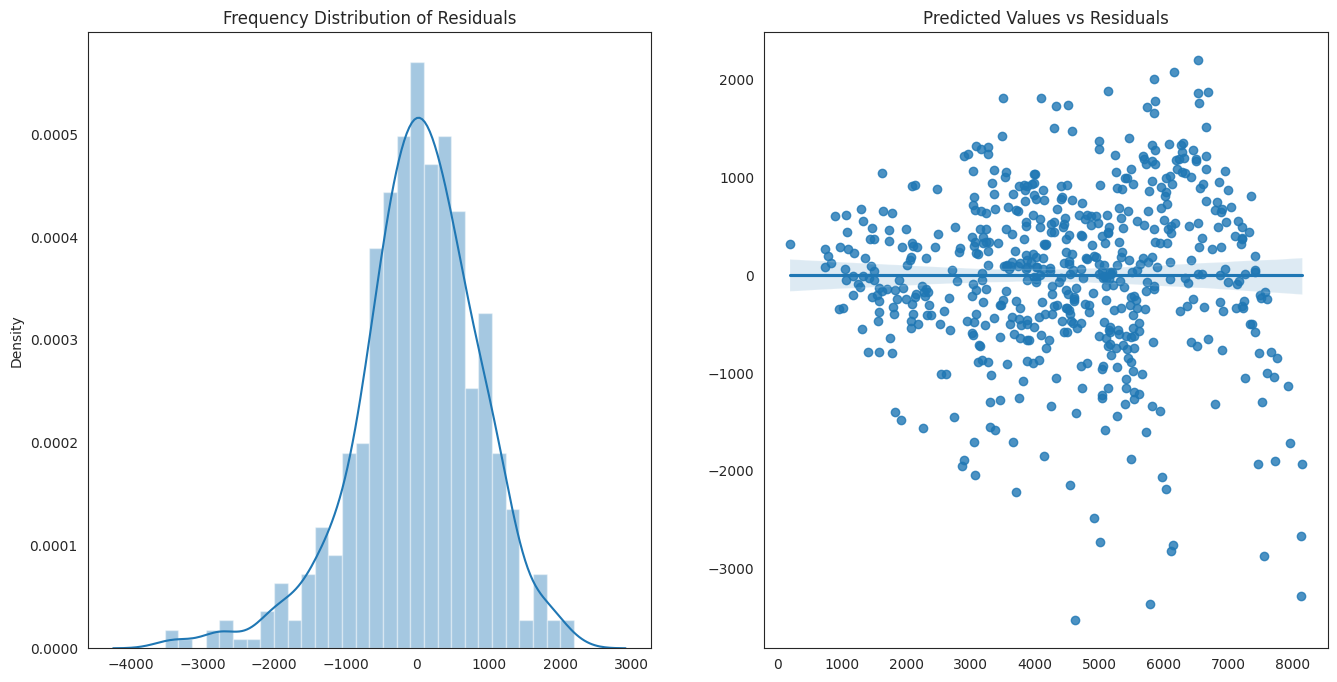

In [138]:
# Residual Analysis of Trained Data
X_train_sm = sm.add_constant(X_train[selected_features])

y_train_pred = final_model.predict(X_train_sm)
fig,ax = plt.subplots(1,2)
fig.set_figheight(8)
fig.set_figwidth(16)

ax[0].set(title='Frequency Distribution of Residuals')
sns.distplot(y_train-y_train_pred, bins=30, ax=ax[0])

ax[1].set(title='Predicted Values vs Residuals')

sns.regplot(x=y_train_pred, y=y_train - y_train_pred, ax=ax[1])
plt.show()

**Residual:**

 For a given data point, the residual is the difference between the observed value of the dependent variable and the value predicted by the regression model.



In [139]:
# Mean of Residuals
(y_train-y_train_pred).mean()  #  is a very small number, which is essentially zero. This indicates that the mean of residuals is extremely close to zero. Such a result is expected because the residuals in a least-squares regression model should sum to zero, and thus their mean should be very close to zero.

1.4074391239871222e-12

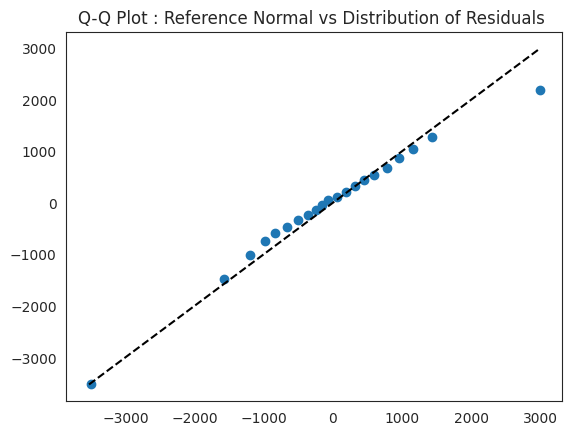

In [140]:
mean = (y_train-y_train_pred).mean()
std = (y_train-y_train_pred).std()

ref_normal = np.random.normal(mean,std,(y_train-y_train_pred).shape[0])


percs = np.linspace(0,100,21)
qn_ref_normal = np.percentile(ref_normal, percs)
qn_residual = np.percentile(y_train - y_train_pred , percs)

plt.plot(qn_ref_normal,qn_residual, ls="", marker="o")

x = np.linspace(np.min((qn_ref_normal.min(),qn_residual.min())), np.max((qn_ref_normal.max(),qn_residual.max())))
plt.plot(x,x, color="k", ls="--")
plt.title('Q-Q Plot : Reference Normal vs Distribution of Residuals ')
plt.show()

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

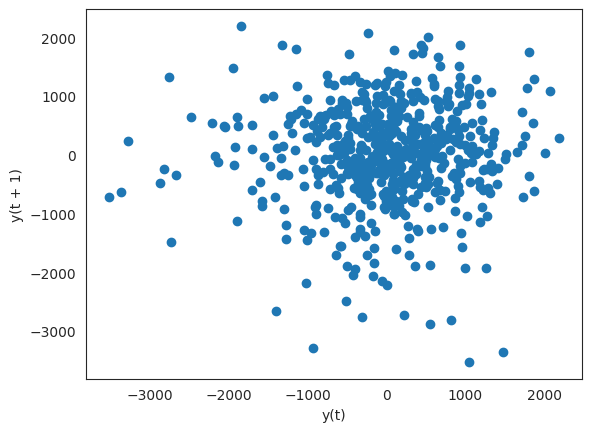

In [141]:
from pandas.plotting import lag_plot
lag_plot(y_train-y_train_pred)

- In the context of residuals from a regression model, a lagplot helps to determine if residuals from one period are correlated with residuals from another period.

  Lagplot of residuals shows no trend. Hence the error terms have constant variance.

Hence, assumptions of Linear Regression are satisfied by this model